In [1]:
#importing packages
import pandas as pd
import numpy as np
from numpy.random import seed
seed(1)
import tensorflow as tf
from sklearn import metrics

In [2]:
df = pd.read_csv("eurovision_preprocessed.csv")

In [3]:
#Audio Features
audio = df.iloc[:,21:]

In [4]:
#Drop duration and popularity
audio = audio.drop(columns=["duration_ms","Popularity"])

In [5]:
#Load lyrics
lyric = np.load("converted_lyrics_24.npy")

In [6]:
#Split audio data into train,validation and test 
from sklearn.model_selection import train_test_split
X_audio_train, X_audio_test, y_audio_train, y_audio_test = train_test_split(audio, df.standard_score, test_size = 0.1,random_state=42)
#X_audio_val, X_audio_test, y_audio_val, y_audio_test = train_test_split(X_audio_test, y_audio_test, test_size = 0.5,random_state=42)

In [7]:
#Split lyrics data into train,valiatidation and test
X_lyric_train, X_lyric_test, y_lyric_train, y_lyric_test = train_test_split(lyric, df.standard_score, test_size = 0.1,random_state=42)
#X_lyric_val, X_lyric_test, y_lyric_val, y_lyric_test = train_test_split(X_lyric_test, y_lyric_test, test_size = 0.5,random_state=42)

## NEURAL NETWORK AUDIO MODEL 

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
tf.random.set_seed(221)

# define the model

model = Sequential()

model.add(Dense(256, input_dim=22, activation='tanh',kernel_regularizer=tf.keras.regularizers.L2(1e-4)))
model.add(Dropout(0.2))

model.add(Dense(128, activation='tanh',kernel_regularizer=tf.keras.regularizers.L2(1e-4)))
model.add(Dropout(0.2))




model.add(Dense(128, activation='tanh',kernel_regularizer=tf.keras.regularizers.L2(1e-4)))



#Output layer
model.add(Dense(1, activation='sigmoid'))

2021-11-29 17:38:20.764631: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


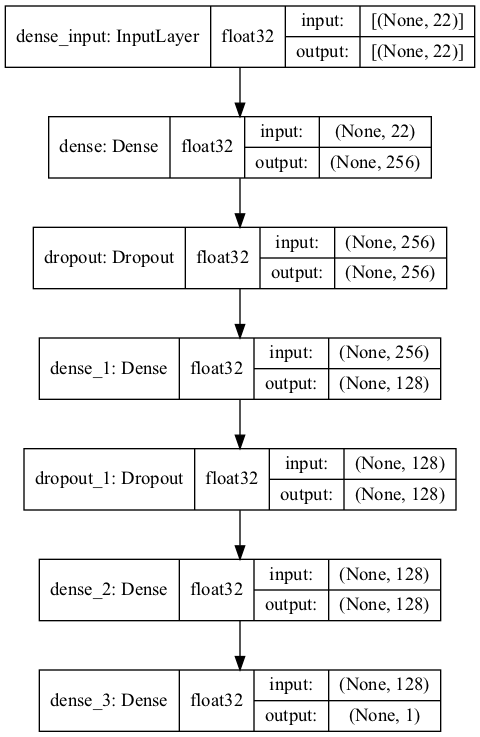

In [9]:
#Visualization of the model
tf.keras.utils.plot_model(
    model,
    to_file="audio_model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    
)

In [18]:
adam = Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=adam, metrics=['mae','RootMeanSquaredError','mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               5888      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 55,425
Trainable params: 55,425
Non-trainable params: 0
__________________________________________________

In [117]:
#Train model
history = model.fit(X_audio_train, y_audio_train, validation_split = 0.2, epochs= 1000, verbose = 0, batch_size = 32)

In [118]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'mae', 'root_mean_squared_error', 'mse', 'val_loss', 'val_mae', 'val_root_mean_squared_error', 'val_mse'])


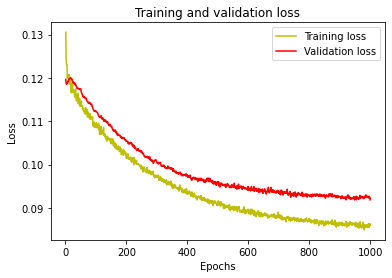

In [119]:
#Loss Profile
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [121]:
#Evaluation of the model
y_audio_pred = model.predict(X_audio_test)
print('R-squared:', round(metrics.r2_score(y_audio_test, y_audio_pred),3))
print('MAE:', round(metrics.mean_absolute_error(y_audio_test, y_audio_pred),3))
print('MSE:',round( metrics.mean_squared_error(y_audio_test, y_audio_pred),3))
print('RMSE:', round(metrics.mean_squared_error(y_audio_test, y_audio_pred, squared = False),3))

R-squared: -0.187
MAE: 0.229
MSE: 0.077
RMSE: 0.278


In [122]:
#Baseline Model
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="constant",constant = 0.5)
dummy_regr.fit(X_audio_train, y_audio_train)
y_audio_pred = dummy_regr.predict(X_audio_test)
print('R-squared:', round(metrics.r2_score(y_audio_test, y_audio_pred),3))
print('MAE:', round(metrics.mean_absolute_error(y_audio_test, y_audio_pred),3))
print('MSE:',round( metrics.mean_squared_error(y_audio_test, y_audio_pred),3))
print('RMSE:', round(metrics.mean_squared_error(y_audio_test, y_audio_pred, squared = False),3))

R-squared: -0.745
MAE: 0.301
MSE: 0.113
RMSE: 0.337


In [20]:
#Predict on test data
predictions = model.predict(X_audio_test)
print("Predicted values are: ", predictions)
print("Real values are: ", y_audio_test)

Predicted values are:  [[0.31926227]
 [0.36466017]
 [0.27697468]
 [0.35287946]
 [0.26746696]
 [0.37648815]
 [0.23154274]
 [0.31405634]
 [0.2787312 ]
 [0.37684333]
 [0.37761822]
 [0.37893438]
 [0.22221074]
 [0.36795634]
 [0.431294  ]
 [0.342071  ]
 [0.29184443]
 [0.3669606 ]
 [0.32208902]
 [0.22994596]
 [0.31231898]
 [0.49032018]
 [0.28553027]
 [0.33637157]
 [0.53663015]
 [0.3320143 ]
 [0.44881105]
 [0.5305048 ]
 [0.41668853]
 [0.38116252]
 [0.35149777]
 [0.27337936]
 [0.31407702]
 [0.32734257]
 [0.38512337]
 [0.25230086]
 [0.29585645]
 [0.26801974]
 [0.3495465 ]
 [0.31338337]
 [0.31994885]
 [0.33921146]
 [0.35718054]
 [0.38121757]
 [0.21534956]
 [0.27388942]
 [0.41658828]
 [0.31719017]
 [0.5380648 ]
 [0.3202039 ]
 [0.57519376]
 [0.31499332]
 [0.448597  ]
 [0.29581308]
 [0.43971452]
 [0.30492562]
 [0.41989526]
 [0.4053575 ]
 [0.27111417]
 [0.43424472]
 [0.2954474 ]
 [0.33492124]
 [0.4618659 ]
 [0.39020208]
 [0.3008091 ]
 [0.4355293 ]
 [0.40492874]
 [0.34081027]
 [0.3168335 ]
 [0.2389410

# NEURAL NETWORK LYRIC MODEL 

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
tf.random.set_seed(221)
# define the model

model = Sequential()

model.add(Dense(512, input_dim=1024, activation='tanh',kernel_regularizer=tf.keras.regularizers.L2(1e-4)))
model.add(Dropout(0.2))

model.add(Dense(256, activation='tanh',kernel_regularizer=tf.keras.regularizers.L2(1e-4)))
model.add(Dropout(0.2))



model.add(Dense(128, activation='tanh',kernel_regularizer=tf.keras.regularizers.L2(1e-4)))
model.add(Dropout(0.2))

model.add(Dense(128, activation='tanh',kernel_regularizer=tf.keras.regularizers.L2(1e-4)))
model.add(Dropout(0.2))

model.add(Dense(128, activation='tanh',kernel_regularizer=tf.keras.regularizers.L2(1e-4)))


#Output layer
model.add(Dense(1, activation='sigmoid'))

In [12]:
adam = Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer= adam, metrics=['mae','RootMeanSquaredError','mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)              

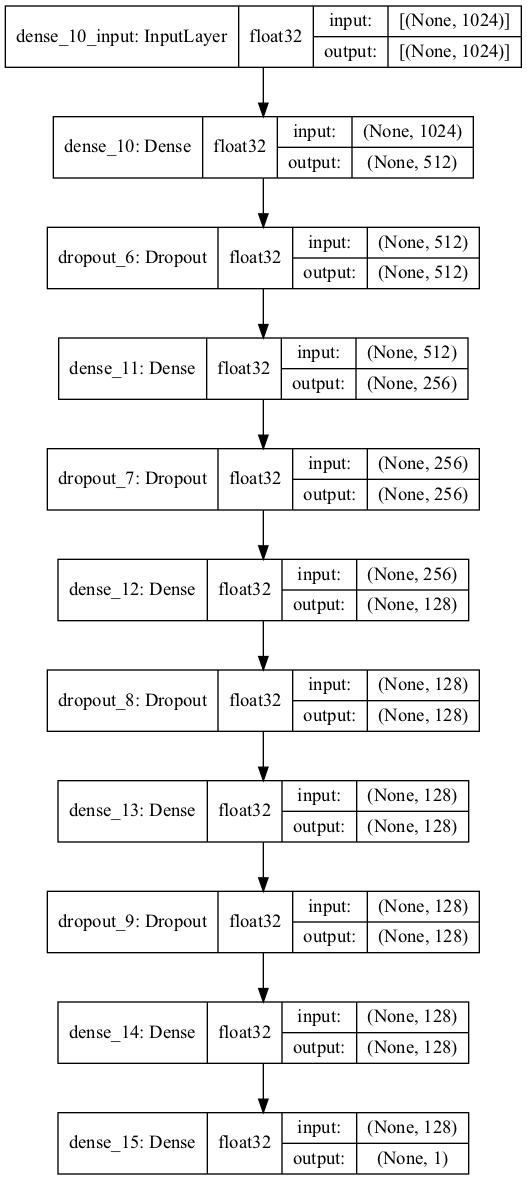

In [13]:
#Visualization of the model
tf.keras.utils.plot_model(
    model,
    to_file="lyrics_model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    
)

In [62]:
history = model.fit(X_lyric_train, y_lyric_train, validation_split = 0.2, epochs =1500, verbose = 0,batch_size = 32)

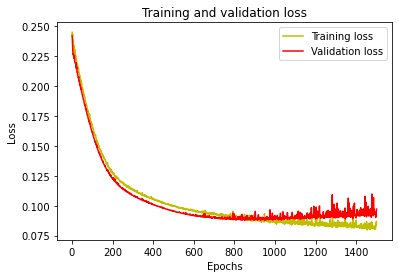

In [63]:
#Loss Profile
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [64]:
#Evaluation of the Lyrics model
y_lyric_pred = model.predict(X_lyric_test)
print('R-squared:',round(metrics.r2_score(y_lyric_test, y_lyric_pred),3))
print('MAE:', round(metrics.mean_absolute_error(y_lyric_test, y_lyric_pred),3))
print('MSE:', round(metrics.mean_squared_error(y_lyric_test, y_lyric_pred),3))
print('RMSE:', round(metrics.mean_squared_error(y_lyric_test, y_lyric_pred, squared = False),3))

R-squared: -0.204
MAE: 0.23
MSE: 0.078
RMSE: 0.28


In [65]:
#Baseline Model
dummy_regr = DummyRegressor(strategy="constant",constant = 0.5)
dummy_regr.fit(X_lyric_train, y_lyric_train)
y_lyric_pred = dummy_regr.predict(X_lyric_test)
print('R-squared:',round(metrics.r2_score(y_lyric_test, y_lyric_pred),3))
print('MAE:', round(metrics.mean_absolute_error(y_lyric_test, y_lyric_pred),3))
print('MSE:', round(metrics.mean_squared_error(y_lyric_test, y_lyric_pred),3))
print('RMSE:', round(metrics.mean_squared_error(y_lyric_test, y_lyric_pred, squared = False),3))

R-squared: -0.745
MAE: 0.301
MSE: 0.113
RMSE: 0.337


# LYRIC AND AUDIO MODEL

In [14]:

# Multiple Inputs

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.merge import concatenate
tf.random.set_seed(221)
# first input model
input1 = Input(shape=(22,))
audio_1 = Dense(256,activation="tanh",kernel_regularizer=tf.keras.regularizers.L2(1e-4))(input1)

dp1 = Dropout(0.2)(audio_1)
audio_2= Dense (128,activation = "tanh",kernel_regularizer=tf.keras.regularizers.L2(1e-4))(dp1)


# second input model
lyric1 = Input(shape=(1024,))
#dp_lyric = Dropout(0.2)(lyric1)
lyric2 = Dense(512,activation="tanh")(lyric1)
dp_lyric2 = Dropout(0.2)(lyric2)
lyric3 = Dense(256, activation = "tanh")(dp_lyric2)
dp_lyric3 = Dropout(0.2)(lyric3)
lyric4 = Dense(128, activation = "tanh")(dp_lyric3)


 #shared layer
shared = Dense(128, activation = "tanh")
op1 = shared(audio_2)
op2 = shared(lyric4)
# merge input models
merge_layer = concatenate([op1,op2])
# interpretation model
hidden1 = Dense(256, activation='tanh',kernel_regularizer=tf.keras.regularizers.L2(1e-3))(merge_layer)
hidden2 = Dense(256, activation='tanh',kernel_regularizer=tf.keras.regularizers.L2(1e-3))(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)


model = Model(inputs=[input1, lyric1], outputs=output)
# summarize layers
print(model.summary())


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1024)]       0                                            
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 512)          524800      input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 22)]         0                                            
__________________________________________________________________________________________________
dropout_11 (Dropout)            (None, 512)          0           dense_18[0][0]                   
______________________________________________________________________________________________

In [15]:
adam = Adam(learning_rate = 0.0001)
model.compile(loss= "mse",optimizer = adam, metrics=['mae','RootMeanSquaredError'])

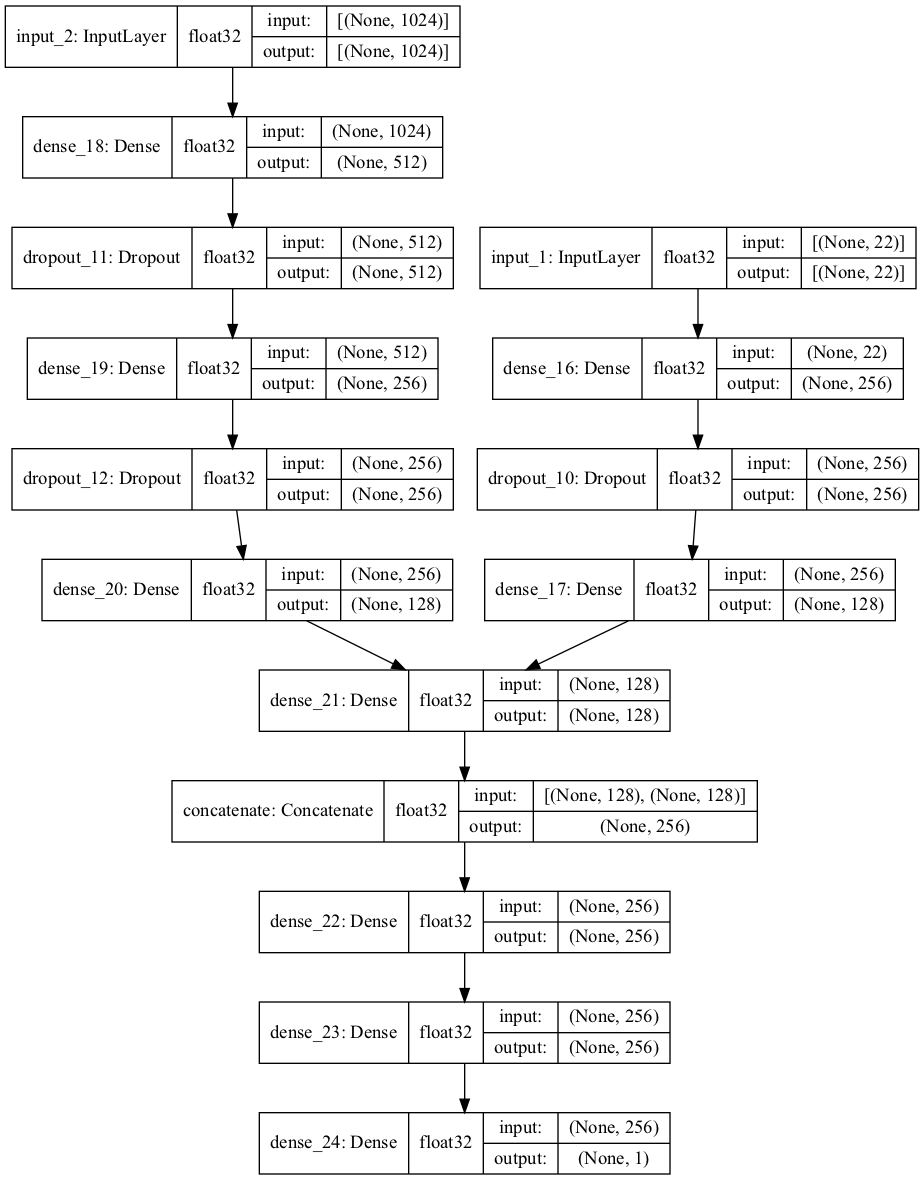

In [16]:
#Visualization of the model
tf.keras.utils.plot_model(
    model,
    to_file="lyrics_model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    
)

In [69]:
history = model.fit([X_audio_train,X_lyric_train], y_lyric_train,
                    epochs=1000, batch_size=32,  validation_split=0.20, verbose = 0)

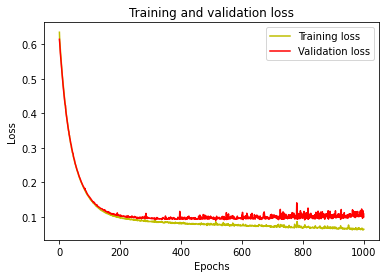

In [70]:
#Loss Profile
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [71]:
#Evaluation of the Audio + Lyrics model
y_audio_pred = model.predict([X_audio_test,X_lyric_test])
print('R-squared:', round(metrics.r2_score(y_audio_test, y_audio_pred),3))
print('MAE:', round(metrics.mean_absolute_error(y_audio_test, y_audio_pred),3))
print('MSE:',round( metrics.mean_squared_error(y_audio_test, y_audio_pred),3))
print('RMSE:', round(metrics.mean_squared_error(y_audio_test, y_audio_pred, squared = False),3))

R-squared: -0.091
MAE: 0.206
MSE: 0.071
RMSE: 0.266


In [72]:
#Baseline model
dummy_regr = DummyRegressor(strategy="constant",constant = 0.5)
dummy_regr.fit(X_lyric_train, y_lyric_train)
y_lyric_pred = dummy_regr.predict(X_lyric_test)
print('R-squared:',round(metrics.r2_score(y_lyric_test, y_lyric_pred),3))
print('MAE:', round(metrics.mean_absolute_error(y_lyric_test, y_lyric_pred),3))
print('MSE:', round(metrics.mean_squared_error(y_lyric_test, y_lyric_pred),3))
print('RMSE:', round(metrics.mean_squared_error(y_lyric_test, y_lyric_pred, squared = False),3))

R-squared: -0.745
MAE: 0.301
MSE: 0.113
RMSE: 0.337


# Random Forest AUDIO

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)

In [133]:
# Fit the grid search to the data
grid_search.fit(X_audio_train, y_audio_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 300}

In [134]:
#Best parameters
grid_search.best_params_

{'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 300}

In [135]:
#Load the best parameter
rf= grid_search.best_estimator_

In [136]:
#Evaluation of the Random Forest model (audio)
y_audio_pred = rf.predict(X_audio_test)
print('R-squared:', round(metrics.r2_score(y_audio_test, y_audio_pred),3))
print('MAE:', round(metrics.mean_absolute_error(y_audio_test, y_audio_pred),3))
print('MSE:',round( metrics.mean_squared_error(y_audio_test, y_audio_pred),3))
print('RMSE:', round(metrics.mean_squared_error(y_audio_test, y_audio_pred, squared = False),3))

R-squared: -0.04
MAE: 0.216
MSE: 0.068
RMSE: 0.26


In [137]:
#Baseline model
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy = "constant",constant = 0.5)
dummy_regr.fit(X_audio_train, y_audio_train)
y_audio_pred = dummy_regr.predict(X_audio_test)
print('R-squared:', round(metrics.r2_score(y_audio_test, y_audio_pred),3))
print('MAE:', round(metrics.mean_absolute_error(y_audio_test, y_audio_pred),3))
print('MSE:',round( metrics.mean_squared_error(y_audio_test, y_audio_pred),3))
print('RMSE:', round(metrics.mean_squared_error(y_audio_test, y_audio_pred, squared = False),3))

R-squared: -0.745
MAE: 0.301
MSE: 0.113
RMSE: 0.337


In [138]:
#Feature importances
sorted(zip(audio.columns, rf.feature_importances_))

[('acousticness', 0.10754495392116863),
 ('danceability', 0.1021093902657389),
 ('energy', 0.09981789879264816),
 ('instrumentalness', 0.05648249987905235),
 ('key_0', 0.009014777812476185),
 ('key_1', 0.0064630405090848305),
 ('key_10', 0.010037232889950367),
 ('key_11', 0.005055494446763437),
 ('key_2', 0.007791226880098826),
 ('key_3', 0.0029326792884156244),
 ('key_4', 0.007146564365453279),
 ('key_5', 0.00622431895299448),
 ('key_6', 0.005790246903550593),
 ('key_7', 0.00806225125497436),
 ('key_8', 0.006261680009554803),
 ('key_9', 0.006721549426142125),
 ('liveness', 0.10073865019119502),
 ('loudness', 0.1305904407217649),
 ('mode', 0.018725436298864306),
 ('speechiness', 0.09671119961553497),
 ('tempo', 0.10297359341183462),
 ('valence', 0.10280487416273928)]

AxesSubplot(0.125,0.125;0.775x0.755)


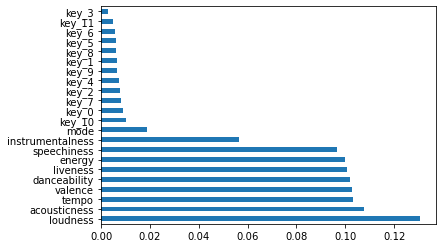

In [150]:
#Visualization of feature importances
feat_importances = pd.Series(rf.feature_importances_, index=audio.columns)
print(feat_importances.nlargest(25).plot(kind='barh'))

# Random Forest LYRIC

In [96]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100, 110, 120],
    'max_features': [2, 3, 5, 7],
    'min_samples_leaf': [3, 4, 5, 7],
    'min_samples_split': [8, 10, 12, 14],
    'n_estimators': [100, 200, 300, 400, 500, 600]}


# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [97]:
grid_search.fit(X_lyric_train, y_lyric_train)
grid_search.best_params_

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits

[CV] END max_depth=80, max_features=7, min_samples_leaf=7, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END max_depth=80, max_features=7, min_samples_leaf=7, min_samples_split=16, n_estimators=200; total time=   0.8s
[CV] END max_depth=80, max_features=7, min_samples_leaf=7, min_samples_split=18, n_estimators=200; total time=   0.8s
[CV] END max_depth=80, max_features=7, min_samples_leaf=9, min_samples_split=14, n_estimators=200; total time=   0.9s
[CV] END max_depth=80, max_features=7, min_samples_leaf=9, min_samples_split=16, n_estimators=100; total time=   0.4s
[CV] END max_depth=80, max_features=7, min_samples_leaf=9, min_samples_split=16, n_estimators=300; total time=   1.2s
[CV] END max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total tim

[CV] END max_depth=100, max_features=5, min_samples_leaf=7, min_samples_split=14, n_estimators=100; total time=   0.4s
[CV] END max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=18, n_estimators=200; total time=   0.5s
[CV] END max_depth=90, max_features=1, min_samples_leaf=7, min_samples_split=14, n_estimators=200; total time=   0.5s
[CV] END max_depth=90, max_features=1, min_samples_leaf=7, min_samples_split=16, n_estimators=100; total time=   0.2s
[CV] END max_depth=90, max_features=1, min_samples_leaf=7, min_samples_split=16, n_estimators=300; total time=   0.7s
[CV] END max_depth=90, max_features=1, min_samples_leaf=9, min_samples_split=14, n_estimators=100; total time=   0.2s
[CV] END max_depth=90, max_features=1, min_samples_leaf=9, min_samples_split=14, n_estimators=200; total time=   0.5s
[CV] END max_depth=90, max_features=1, min_samples_leaf=9, min_samples_split=16, n_estimators=200; total time=   0.5s
[CV] END max_depth=90, max_features=1, min_samples_leaf

[CV] END max_depth=100, max_features=7, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.9s
[CV] END max_depth=90, max_features=1, min_samples_leaf=9, min_samples_split=14, n_estimators=300; total time=   0.7s
[CV] END max_depth=90, max_features=1, min_samples_leaf=9, min_samples_split=16, n_estimators=300; total time=   0.7s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.6s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.7s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=18, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=18, n_estimators=300; total time=   0.9s
[CV] END max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=16, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=3, min_samples_leaf

[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=14, n_estimators=200; total time=   0.9s
[CV] END max_depth=90, max_features=1, min_samples_leaf=7, min_samples_split=16, n_estimators=200; total time=   0.5s
[CV] END max_depth=90, max_features=1, min_samples_leaf=7, min_samples_split=18, n_estimators=200; total time=   0.5s
[CV] END max_depth=90, max_features=1, min_samples_leaf=9, min_samples_split=14, n_estimators=200; total time=   0.5s
[CV] END max_depth=90, max_features=1, min_samples_leaf=9, min_samples_split=16, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=1, min_samples_leaf=9, min_samples_split=16, n_estimators=300; total time=   0.7s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.6s
[CV] END max_depth=90, max_features=3, min_samples_leaf

[CV] END max_depth=100, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=16, n_estimators=300; total time=   0.8s
[CV] END max_depth=90, max_features=1, min_samples_leaf=5, min_samples_split=18, n_estimators=300; total time=   0.9s
[CV] END max_depth=90, max_features=1, min_samples_leaf=7, min_samples_split=16, n_estimators=300; total time=   0.7s
[CV] END max_depth=90, max_features=1, min_samples_leaf=7, min_samples_split=18, n_estimators=300; total time=   0.7s
[CV] END max_depth=90, max_features=1, min_samples_leaf=9, min_samples_split=16, n_estimators=200; total time=   0.5s
[CV] END max_depth=90, max_features=1, min_samples_leaf=9, min_samples_split=18, n_estimators=100; total time=   0.2s
[CV] END max_depth=90, max_features=1, min_samples_leaf=9, min_samples_split=18, n_estimators=300; total time=   0.7s
[CV] END max_depth=90, max_features=3, min_samples_leaf

[CV] END max_depth=100, max_features=7, min_samples_leaf=5, min_samples_split=18, n_estimators=100; total time=   0.5s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=16, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=16, n_estimators=300; total time=   1.0s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=18, n_estimators=300; total time=   1.0s
[CV] END max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=16, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=16, n_estimators=300; total time=   0.9s
[CV] END max_depth=90, max_features=3, min_samples_leaf=9, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=3, min_samples_leaf=9, min_samples_split=14, n_estimators=200; total time=   0.6s
[CV] END max_depth=90, max_features=3, min_samples_leaf

[CV] END max_depth=100, max_features=7, min_samples_leaf=9, min_samples_split=14, n_estimators=300; total time=   1.2s
[CV] END max_depth=100, max_features=1, min_samples_leaf=5, min_samples_split=18, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=1, min_samples_leaf=5, min_samples_split=18, n_estimators=300; total time=   0.7s
[CV] END max_depth=100, max_features=1, min_samples_leaf=7, min_samples_split=16, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=1, min_samples_leaf=7, min_samples_split=16, n_estimators=200; total time=   0.5s
[CV] END max_depth=100, max_features=1, min_samples_leaf=7, min_samples_split=18, n_estimators=200; total time=   0.5s
[CV] END max_depth=100, max_features=1, min_samples_leaf=9, min_samples_split=14, n_estimators=100; total time=   0.2s
[CV] END max_depth=100, max_features=1, min_samples_leaf=9, min_samples_split=14, n_estimators=300; total time=   0.7s
[CV] END max_depth=100, max_features=1, min_samp

[CV] END max_depth=110, max_features=5, min_samples_leaf=9, min_samples_split=18, n_estimators=200; total time=   0.9s
[CV] END max_depth=100, max_features=1, min_samples_leaf=7, min_samples_split=18, n_estimators=300; total time=   0.7s
[CV] END max_depth=100, max_features=1, min_samples_leaf=9, min_samples_split=16, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=1, min_samples_leaf=9, min_samples_split=16, n_estimators=200; total time=   0.5s
[CV] END max_depth=100, max_features=1, min_samples_leaf=9, min_samples_split=18, n_estimators=200; total time=   0.5s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   1.0s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=18, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=3, min_samp

[CV] END max_depth=110, max_features=7, min_samples_leaf=7, min_samples_split=14, n_estimators=200; total time=   0.9s
[CV] END max_depth=100, max_features=5, min_samples_leaf=7, min_samples_split=14, n_estimators=300; total time=   1.2s
[CV] END max_depth=100, max_features=5, min_samples_leaf=7, min_samples_split=18, n_estimators=100; total time=   0.4s
[CV] END max_depth=100, max_features=5, min_samples_leaf=7, min_samples_split=18, n_estimators=200; total time=   0.8s
[CV] END max_depth=100, max_features=5, min_samples_leaf=9, min_samples_split=14, n_estimators=200; total time=   0.7s
[CV] END max_depth=100, max_features=5, min_samples_leaf=9, min_samples_split=16, n_estimators=100; total time=   0.4s
[CV] END max_depth=100, max_features=5, min_samples_leaf=9, min_samples_split=16, n_estimators=300; total time=   1.1s
[CV] END max_depth=100, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.4s
[CV] END max_depth=100, max_features=7, min_samp

[CV] END max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   1.4s
[CV] END max_depth=100, max_features=7, min_samples_leaf=5, min_samples_split=16, n_estimators=300; total time=   1.4s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=14, n_estimators=200; total time=   0.9s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=16, n_estimators=100; total time=   0.5s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=16, n_estimators=300; total time=   1.4s
[CV] END max_depth=100, max_features=7, min_samples_leaf=9, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END max_depth=100, max_features=7, min_samples_leaf=9, min_samples_split=14, n_estimators=200; total time=   0.9s
[CV] END max_depth=100, max_features=7, min_sampl

[CV] END max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.1s
[CV] END max_depth=100, max_features=7, min_samples_leaf=5, min_samples_split=18, n_estimators=100; total time=   0.5s
[CV] END max_depth=100, max_features=7, min_samples_leaf=5, min_samples_split=18, n_estimators=200; total time=   1.0s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=14, n_estimators=200; total time=   0.9s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=16, n_estimators=200; total time=   0.9s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=18, n_estimators=100; total time=   0.4s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=18, n_estimators=300; total time=   1.3s
[CV] END max_depth=100, max_features=7, min_samples_leaf=9, min_samples_split=14, n_estimators=300; total time=   1.2s
[CV] END max_depth=100, max_features=7, min_sampl

[CV] END max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total time=   1.9s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=16, n_estimators=200; total time=   1.0s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=18, n_estimators=100; total time=   0.5s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=18, n_estimators=300; total time=   1.3s
[CV] END max_depth=100, max_features=7, min_samples_leaf=9, min_samples_split=16, n_estimators=100; total time=   0.4s
[CV] END max_depth=100, max_features=7, min_samples_leaf=9, min_samples_split=16, n_estimators=200; total time=   0.8s
[CV] END max_depth=100, max_features=7, min_samples_leaf=9, min_samples_split=18, n_estimators=200; total time=   0.8s
[CV] END max_depth=110, max_features=1, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=110, max_features=1, min_sample

[CV] END max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END max_depth=100, max_features=7, min_samples_leaf=5, min_samples_split=18, n_estimators=300; total time=   1.4s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=14, n_estimators=300; total time=   1.5s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=18, n_estimators=200; total time=   0.9s
[CV] END max_depth=100, max_features=7, min_samples_leaf=9, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END max_depth=100, max_features=7, min_samples_leaf=9, min_samples_split=14, n_estimators=300; total time=   1.2s
[CV] END max_depth=100, max_features=7, min_samples_leaf=9, min_samples_split=16, n_estimators=300; total time=   1.2s
[CV] END max_depth=110, max_features=1, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=110, max_features=1, min_sampl

[CV] END max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   1.7s
[CV] END max_depth=100, max_features=7, min_samples_leaf=9, min_samples_split=18, n_estimators=100; total time=   0.4s
[CV] END max_depth=100, max_features=7, min_samples_leaf=9, min_samples_split=18, n_estimators=200; total time=   0.9s
[CV] END max_depth=110, max_features=1, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.5s
[CV] END max_depth=110, max_features=1, min_samples_leaf=5, min_samples_split=16, n_estimators=100; total time=   0.3s
[CV] END max_depth=110, max_features=1, min_samples_leaf=5, min_samples_split=16, n_estimators=300; total time=   0.8s
[CV] END max_depth=110, max_features=1, min_samples_leaf=5, min_samples_split=18, n_estimators=300; total time=   0.8s
[CV] END max_depth=110, max_features=1, min_samples_leaf=7, min_samples_split=16, n_estimators=200; total time=   0.5s
[CV] END max_depth=110, max_features=1, min_sampl

[CV] END max_depth=80, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400; total time=   1.1s
[CV] END max_depth=110, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   1.1s
[CV] END max_depth=110, max_features=7, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.9s
[CV] END max_depth=110, max_features=7, min_samples_leaf=5, min_samples_split=18, n_estimators=100; total time=   0.4s
[CV] END max_depth=110, max_features=7, min_samples_leaf=5, min_samples_split=18, n_estimators=300; total time=   1.3s
[CV] END max_depth=110, max_features=7, min_samples_leaf=7, min_samples_split=14, n_estimators=300; total time=   1.4s
[CV] END max_depth=110, max_features=7, min_samples_leaf=7, min_samples_split=18, n_estimators=200; total time=   0.9s
[CV] END max_depth=110, max_features=7, min_samples_leaf=9, min_samples_split=14, n_estimators=100; total time=   0.4s
[CV] END max_depth=110, max_features=7, min_sample

[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   2.1s
[CV] END max_depth=110, max_features=7, min_samples_leaf=7, min_samples_split=16, n_estimators=200; total time=   0.9s
[CV] END max_depth=110, max_features=7, min_samples_leaf=7, min_samples_split=18, n_estimators=100; total time=   0.4s
[CV] END max_depth=110, max_features=7, min_samples_leaf=7, min_samples_split=18, n_estimators=300; total time=   1.3s
[CV] END max_depth=110, max_features=7, min_samples_leaf=9, min_samples_split=16, n_estimators=100; total time=   0.4s
[CV] END max_depth=110, max_features=7, min_samples_leaf=9, min_samples_split=16, n_estimators=200; total time=   0.8s
[CV] END max_depth=110, max_features=7, min_samples_leaf=9, min_samples_split=18, n_estimators=200; total time=   0.9s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END max_depth=80, max_features=2, min_samples_

[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   1.5s
[CV] END max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.7s
[CV] END max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   1.4s
[CV] END max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   1.0s
[CV] END max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   1.3s
[CV] END max_depth=80, max_features=2, min_samples_leaf=

[CV] END max_depth=80, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.3s
[CV] END max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=400; total time=   1.5s
[CV] END max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.6s
[CV] END max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   1.2s
[CV] END max_depth=80, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=80, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=80, max_features=2, min_samples_leaf=7, 

[CV] END max_depth=80, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   1.7s
[CV] END max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   1.6s
[CV] END max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   0.9s
[CV] END max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=500; total time=   1.4s
[CV] END max_depth=80, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   0.8s
[CV] END max_depth=80, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   1.7s
[CV] END max_depth=80, max_features=2, min_samples_leaf=7,

[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   1.3s
[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   2.3s
[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   1.1s
[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=600; total time=   2.5s
[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   1.5s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7, 

[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   1.3s
[CV] END max_depth=80, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   1.7s
[CV] END max_depth=80, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   1.8s
[CV] END max_depth=80, max_features=2, min_samples_leaf=7, min_samples_split=12, n_estimators=400; total time=   1.2s
[CV] END max_depth=80, max_features=2, min_samples_leaf=7, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=80, max_features=2, min_samples_leaf=7, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=80, max_features=2, min_samples_leaf=7, min_samples_split=14, n_estimators=200; total time=   0.6s
[CV] END max_depth=80, max_features=2, min_samples_leaf=7, min_samples_split=14, n_estimators=400; total time=   1.1s
[CV] END max_depth=80, max_features=3, min_samples_leaf=3

[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=500; total time=   2.1s
[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   1.2s
[CV] END max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=600; total time=   2.3s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400; total time=   1.4s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.4s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7

[CV] END max_depth=80, max_features=7, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   2.8s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   1.1s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   2.1s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7, min_samples_split=12, n_estimators=200; total time=   0.7s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7, min_samples_split=12, n_estimators=400; total time=   1.5s
[CV] END max_depth=80, max_features=3, min_samples_leaf=7, mi

[CV] END max_depth=80, max_features=7, min_samples_leaf=5, min_samples_split=12, n_estimators=400; total time=   1.8s
[CV] END max_depth=80, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   2.6s
[CV] END max_depth=80, max_features=5, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   1.6s
[CV] END max_depth=80, max_features=5, min_samples_leaf=4, min_samples_split=14, n_estimators=600; total time=   2.9s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total time=   1.7s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5

[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=80, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=   2.5s
[CV] END max_depth=80, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END max_depth=80, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   1.1s
[CV] END max_depth=80, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=400; total time=   2.4s
[CV] END max_depth=80, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=600; total time=   3.0s
[CV] END max_depth=80, max_features=5, min_samples_leaf=4, min_samples_split=14, n_estimators=500; total time=   2.4s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   1.3s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, 

[CV] END max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   0.6s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   2.3s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   1.4s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=600; total time=   2.5s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   1.7s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7,

[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   1.3s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   2.7s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   1.5s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   2.0s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   1.3s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=600; total time=   2.4s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=400; total time=   1.5s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7,

[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   1.3s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   1.2s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   2.2s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=12, n_estimators=200; total time=   0.8s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=12, n_estimators=400; total time=   1.5s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=12, n_estimators=600; total time=   2.3s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=14, n_estimators=500; total time=   1.9s
[CV] END max_depth=80, max_features=7, min_samples_leaf=3,

[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   0.9s
[CV] END max_depth=80, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=600; total time=   2.5s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   1.8s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   2.3s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   2.0s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7, min_samples_split=14, n_estimators=300; total time=   1.1s
[CV] END max_depth=80, max_features=5, min_samples_leaf=7

[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.6s
[CV] END max_depth=80, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END max_depth=80, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.9s
[CV] END max_depth=80, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   1.4s
[CV] END max_depth=80, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=600; total time=   2.7s
[CV] END max_depth=80, max_features=7, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   2.1s
[CV] END max_depth=80, max_features=7, min_samples_leaf=7, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_depth=80, max_features=7, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END max_depth=80, max_features=7, min_samples_leaf=7

[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV] END max_depth=80, max_features=7, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   2.3s
[CV] END max_depth=80, max_features=7, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   1.3s
[CV] END max_depth=80, max_features=7, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   2.3s
[CV] END max_depth=80, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   1.3s
[CV] END max_depth=80, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=500; total time=   2.2s
[CV] END max_depth=80, max_features=7, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   1.3s
[CV] END max_depth=80, max_features=7, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   2.6s
[CV] END max_depth=80, max_features=7, min_samples_leaf=7,

[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.3s
[CV] END max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   1.2s
[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.0s
[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=   1.8s
[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.5s
[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END max_depth=90, max_features=2, min_samples_leaf=4, m

[CV] END max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   2.1s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total time=   1.7s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, m

[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.8s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total time=   1.6s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   2.3s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.5s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.9s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   1.5s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, m

[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=14, n_estimators=100; total time=   0.4s
[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=400; total time=   1.3s
[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END max_depth=90, max_features=2, min_samples_leaf=4

[CV] END max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   1.2s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=600; total time=   1.7s
[CV] END max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   1.4s
[CV] END max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=500; total time=   1.4s
[CV] END max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=12, n_estimators=300; total time=   0.8s
[CV] END max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   1.4s
[CV] END max_depth=90, max_features=2, min_samples_leaf=7

[CV] END max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=600; total time=   2.3s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=600; total time=   1.8s
[CV] END max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   1.4s
[CV] END max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   1.7s
[CV] END max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=12, n_estimators=600; total time=   1.7s
[CV] END max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=14, n_estimators=400; total time=   1.1s
[CV] END max_depth=90, max_features=3, min_samples_leaf=3

[CV] END max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.8s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   1.0s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   1.6s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   1.0s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=500; total time=   1.7s
[CV] END max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   1.9s
[CV] END max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END max_depth=90, max_features=3, min_samples_leaf=7,

[CV] END max_depth=90, max_features=7, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.6s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.9s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   1.6s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   1.0s
[CV] END max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=500; total time=   1.7s
[CV] END max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   1.0s
[CV] END max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   1.5s
[CV] END max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=90, max_features=3, min_samples_leaf=7,

[CV] END max_depth=90, max_features=7, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   1.7s
[CV] END max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   1.2s
[CV] END max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=600; total time=   2.4s
[CV] END max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   1.6s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.2s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   2.0s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4, m

[CV] END max_depth=90, max_features=7, min_samples_leaf=7, min_samples_split=12, n_estimators=200; total time=   0.9s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.8s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   1.2s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=600; total time=   2.3s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=14, n_estimators=500; total time=   2.0s
[CV] END max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total time=   1.6s
[CV] END max_depth=90, max_features=5, min_samples_leaf=5,

[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   0.6s
[CV] END max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   1.2s
[CV] END max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=   1.9s
[CV] END max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   0.9s
[CV] END max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   1.6s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4

[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.8s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   1.2s
[CV] END max_depth=90, max_features=5, min_samples_leaf=4, min_samples_split=14, n_estimators=600; total time=   2.4s
[CV] END max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   2.0s
[CV] END max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.4s
[CV] END max_depth=90, max_features=5, min_samples_leaf=5

[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   1.5s
[CV] END max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=600; total time=   2.5s
[CV] END max_depth=90, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   2.3s
[CV] END max_depth=90, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=90, max_features=5, min_samples_leaf=7, min_samples_split=12, n_estimators=200; total time=   0.7s
[CV] END max_depth=90, max_features=5, min_samples_leaf=7, min_samples_split=12, n_estimators=300; total time=   1.1s
[CV] END max_depth=90, max_features=5, min_samples_leaf=7, min_samples_split=12, n_estimators=600; total time=   2.3s
[CV] END max_depth=90, max_features=5, min_samples_leaf=7

[CV] END max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=500; total time=   1.9s
[CV] END max_depth=90, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   1.1s
[CV] END max_depth=90, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   1.9s
[CV] END max_depth=90, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=90, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END max_depth=90, max_features=5, min_samples_leaf=7, min_samples_split=12, n_estimators=300; total time=   1.1s
[CV] END max_depth=90, max_features=5, min_samples_leaf=7, min_samples_split=12, n_estimators=600; total time=   2.3s
[CV] END max_depth=90, max_features=5, min_samples_leaf=7,

[CV] END max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.5s
[CV] END max_depth=90, max_features=7, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   2.3s
[CV] END max_depth=90, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   1.3s
[CV] END max_depth=90, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=500; total time=   2.4s
[CV] END max_depth=90, max_features=7, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   1.3s
[CV] END max_depth=90, max_features=7, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   2.9s
[CV] END max_depth=90, max_features=7, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END max_depth=90, max_features=7, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END max_depth=90, max_features=7, min_samples_leaf=7

[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=90, max_features=7, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   1.2s
[CV] END max_depth=90, max_features=7, min_samples_leaf=5, min_samples_split=12, n_estimators=400; total time=   2.0s
[CV] END max_depth=90, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END max_depth=90, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END max_depth=90, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.9s
[CV] END max_depth=90, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   1.8s
[CV] END max_depth=90, max_features=7, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=90, max_features=7, min_samples_leaf=

[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=7, min_samples_leaf=7, min_samples_split=12, n_estimators=300; total time=   1.3s
[CV] END max_depth=90, max_features=7, min_samples_leaf=7, min_samples_split=12, n_estimators=600; total time=   2.7s
[CV] END max_depth=90, max_features=7, min_samples_leaf=7, min_samples_split=14, n_estimators=500; total time=   2.1s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=600; total time=   1.9s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END max_depth=100, max_features=2, min_samples_lea

[CV] END max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   1.2s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=600; total time=   1.8s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   1.5s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.5s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.9s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   1.5s
[CV] END max_depth=100, max_features=2, min_sampl

[CV] END max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=400; total time=   1.2s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.8s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   1.5s
[CV] END max_depth=100, max_features=2, min_sample

[CV] END max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=   1.8s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.5s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.9s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=600; total time=   1.8s
[CV] END max_depth=100, max_features=2, min_samples

[CV] END max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=400; total time=   1.6s
[CV] END max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400; total time=   1.2s
[CV] END max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.1s
[CV] END max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   1.7s
[CV] END max_depth=100, max_features=2, min_samples_

[CV] END max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   1.2s
[CV] END max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=600; total time=   1.8s
[CV] END max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   1.4s
[CV] END max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   1.7s
[CV] END max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=12, n_estimators=400; total time=   1.2s
[CV] END max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=2, min_sampl

[CV] END max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=600; total time=   2.3s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.3s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.9s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   1.6s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   1.0s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=500; total time=   1.7s
[CV] END max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   1.9s
[CV] END max_depth=100, max_features=3, min_sample

[CV] END max_depth=100, max_features=7, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   1.0s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   2.0s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=400; total time=   1.2s
[CV] END max_depth=100, max_features=3, min_samples_


[CV] END max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=500; total time=   1.5s
[CV] END max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=12, n_estimators=400; total time=   1.3s
[CV] END max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=12, n_estimators=600; total time=   1.9s
[CV] END max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=14, n_estimators=500; total time=   1.6s
[CV] END max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.2s
[CV] END max_depth=100, max_features=5, min_samp

[CV] END max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=400; total time=   1.2s
[CV] END max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.8s
[CV] END max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   1.2s
[CV] END max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=600; total time=   2.4s
[CV] END max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=14, n_estimators=500; total time=   2.1s
[CV] END max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.2s
[CV] END max_depth=100, max_features=5, min_sample

[CV] END max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   1.4s
[CV] END max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   1.2s
[CV] END max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=   2.0s
[CV] END max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=14, n_estimators=300; total time=   1.2s
[CV] END max_depth=100, max_features=5, min_samples_leaf=3, min_samples_split=14, n_estimators=500; total time=   2.1s
[CV] END max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.2s
[CV] END max_depth=100, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   2.0s
[CV] END max_depth=100, max_features=5, min_sample

[CV] END max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   2.1s
[CV] END max_depth=100, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=400; total time=   1.6s
[CV] END max_depth=100, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=100, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=100, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END max_depth=100, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END max_depth=100, max_features=5, min_samples_leaf=7, min_samples_split=12, n_estimators=500; total time=   1.9s
[CV] END max_depth=100, max_features=5, min_samples_leaf=7, min_samples_split=14, n_estimators=300; total time=   1.2s
[CV] END max_depth=100, max_features=5, min_sampl


[CV] END max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.4s
[CV] END max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   2.0s
[CV] END max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.8s
[CV] END max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   1.5s
[CV] END max_depth=100, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=600; total time=   2.3s
[CV] END max_depth=100, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   2.3s
[CV] END max_depth=100, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END max_depth=100, max_features=5, min_samp

[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=14, n_estimators=100; total time=   0.4s
[CV] END max_depth=100, max_features=7, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=100, max_features=7, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.4s
[CV] END max_depth=100, max_features=7, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   2.3s
[CV] END max_depth=100, max_features=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_depth=100, max_features=7, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.9s
[CV] END max_depth=100, max_features=7, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END max_depth=100, max_features=7, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END max_depth=100, max_features=7, min_samples

[CV] END max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   1.4s
[CV] END max_depth=100, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   1.3s
[CV] END max_depth=100, max_features=7, min_samples_leaf=5, min_samples_split=14, n_estimators=600; total time=   2.6s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=8, n_estimators=400; total time=   1.7s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_depth=100, max_features=7, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END max_depth=100, max_features=7, min_sampl

[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=14, n_estimators=600; total time=   2.1s
[CV] END max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   0.6s
[CV] END max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   1.2s
[CV] END max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END max_depth=110, max_features=2, min_samples

[CV] END max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=12, n_estimators=600; total time=   1.9s
[CV] END max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   2.1s
[CV] END max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=600; total time=   1.8s
[CV] END max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   1.1s
[CV] END max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=600; total time=   1.8s
[CV] END max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=   1.8s
[CV] END max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END max_depth=110, max_features=2, min_sampl

[CV] END max_depth=110, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=400; total time=   1.3s
[CV] END max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=600; total time=   1.8s
[CV] END max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=600; total time=   1.8s
[CV] END max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=400; total time=   1.2s
[CV] END max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=110, max_features=2, min_sampl

[CV] END max_depth=110, max_features=5, min_samples_leaf=3, min_samples_split=14, n_estimators=300; total time=   1.2s[CV] END max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=600; total time=   1.8s
[CV] END max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=500; total time=   1.4s
[CV] END max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   1.4s
[CV] END max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   1.7s
[CV] END max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=12, n_estimators=400; total time=   1.1s
[CV] END max_depth=110, max_features=2, min_samples

[CV] END max_depth=110, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   1.2s
[CV] END max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   1.5s
[CV] END max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.7s
[CV] END max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   1.5s
[CV] END max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   0.9s
[CV] END max_depth=110, max_features=2, min_samples

[CV] END max_depth=110, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=14, n_estimators=100; total time=   0.4s
[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.7s
[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   1.5s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total time=   1.4s
[CV] END max_depth=110, max_features=3, min_samples_

[CV] END max_depth=110, max_features=7, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.0s
[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=   2.0s
[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.7s
[CV] END max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   1.1s
[CV] END max_depth=110, max_features=3, min_samples_

[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.5s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   1.8s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.3s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.0s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=600; total time=   2.1s
[CV] END max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   1.5s
[CV] END max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=110, max_features=3, min_samples

[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.9s
[CV] END max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=14, n_estimators=600; total time=   1.9s
[CV] END max_depth=110, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.3s
[CV] END max_depth=110, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=600; total time=   2.5s
[CV] END max_depth=110, max_features=5, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   2.1s
[CV] END max_depth=110, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.8s
[CV] END max_depth=110, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=400; total time=   1.6s
[CV] END max_depth=110, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=600; total time=   2.4s
[CV] END max_depth=110, max_features=5, min_sample


[CV] END max_depth=110, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   1.2s
[CV] END max_depth=110, max_features=5, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=   2.0s
[CV] END max_depth=110, max_features=5, min_samples_leaf=3, min_samples_split=14, n_estimators=300; total time=   1.2s
[CV] END max_depth=110, max_features=5, min_samples_leaf=3, min_samples_split=14, n_estimators=500; total time=   2.0s
[CV] END max_depth=110, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.2s
[CV] END max_depth=110, max_features=5, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=   2.4s
[CV] END max_depth=110, max_features=5, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.6s
[CV] END max_depth=110, max_features=5, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END max_depth=110, max_features=5, min_sampl

[CV] END max_depth=120, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=   1.6s
[CV] END max_depth=110, max_features=5, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   2.0s
[CV] END max_depth=110, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=110, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END max_depth=110, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   1.1s
[CV] END max_depth=110, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=600; total time=   2.3s
[CV] END max_depth=110, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   1.6s
[CV] END max_depth=110, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=110, max_features=5, min_sample

[CV] END max_depth=120, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   1.5s
[CV] END max_depth=110, max_features=5, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.3s
[CV] END max_depth=110, max_features=5, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   1.9s
[CV] END max_depth=110, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.8s
[CV] END max_depth=110, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   1.6s
[CV] END max_depth=110, max_features=5, min_samples_leaf=5, min_samples_split=14, n_estimators=600; total time=   2.4s
[CV] END max_depth=110, max_features=5, min_samples_leaf=7, min_samples_split=8, n_estimators=600; total time=   2.2s
[CV] END max_depth=110, max_features=5, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END max_depth=110, max_features=5, min_sampl

[CV] END max_depth=120, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=110, max_features=7, min_samples_leaf=3, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END max_depth=110, max_features=7, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   1.0s
[CV] END max_depth=110, max_features=7, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   1.8s
[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=8, n_estimators=400; total time=   1.9s
[CV] END max_depth=110, max_features=7, min_samples_

[CV] END max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=8, n_estimators=600; total time=   2.8s
[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.4s
[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   1.0s
[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=12, n_estimators=400; total time=   1.9s
[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=12, n_estimators=600; total time=   2.8s
[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=14, n_estimators=600; total time=   2.8s
[CV] END max_depth=110, max_features=7, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total time=   1.8s
[CV] END max_depth=110, max_features=7, min_sample

[CV] END max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=   1.6s
[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   1.0s
[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   1.4s
[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=12, n_estimators=600; total time=   2.6s
[CV] END max_depth=110, max_features=7, min_samples_leaf=4, min_samples_split=14, n_estimators=500; total time=   2.3s
[CV] END max_depth=110, max_features=7, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END max_depth=110, max_features=7, min_samples_leaf=5, min_samples_split=8, n_estimators=400; total time=   1.8s
[CV] END max_depth=110, max_features=7, min_sample

[CV] END max_depth=120, max_features=3, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   1.0s[CV] END max_depth=110, max_features=7, min_samples_leaf=7, min_samples_split=12, n_estimators=100; total time=   0.5s
[CV] END max_depth=110, max_features=7, min_samples_leaf=7, min_samples_split=12, n_estimators=200; total time=   0.9s
[CV] END max_depth=110, max_features=7, min_samples_leaf=7, min_samples_split=12, n_estimators=400; total time=   2.0s
[CV] END max_depth=110, max_features=7, min_samples_leaf=7, min_samples_split=14, n_estimators=100; total time=   0.5s
[CV] END max_depth=110, max_features=7, min_samples_leaf=7, min_samples_split=14, n_estimators=200; total time=   0.9s
[CV] END max_depth=110, max_features=7, min_samples_leaf=7, min_samples_split=14, n_estimators=300; total time=   1.7s
[CV] END max_depth=110, max_features=7, min_samples_leaf=7, min_samples_split=14, n_estimators=600; total time=   4.0s
[CV] END max_depth=120, max_features=2, min_sampl

[CV] END max_depth=120, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500; total time=   1.8s
[CV] END max_depth=120, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=120, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=120, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=120, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END max_depth=120, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   1.9s
[CV] END max_depth=120, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=   1.6s
[CV] END max_depth=120, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=300; total time=   0.9s
[CV] END max_depth=120, max_features=2, min_sampl

{'max_depth': 120,
 'max_features': 2,
 'min_samples_leaf': 7,
 'min_samples_split': 10,
 'n_estimators': 100}

In [98]:
#Load best parameters
rf= grid_search.best_estimator_

In [99]:
#Evaluation of the audio model (Lyrics)
y_lyric_pred = rf.predict(X_lyric_test)
print('R-squared:',round(metrics.r2_score(y_lyric_test, y_lyric_pred),3))
print('MAE:', round(metrics.mean_absolute_error(y_lyric_test, y_lyric_pred),3))
print('MSE:', round(metrics.mean_squared_error(y_lyric_test, y_lyric_pred),3))
print('RMSE:', round(metrics.mean_squared_error(y_lyric_test, y_lyric_pred, squared = False),3))

R-squared: -0.124
MAE: 0.226
MSE: 0.073
RMSE: 0.27


In [100]:
#Baseline model
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy = "constant",constant = 0.5)
dummy_regr.fit(X_audio_train, y_audio_train)
y_audio_pred = dummy_regr.predict(X_audio_test)
print('R-squared:', round(metrics.r2_score(y_audio_test, y_audio_pred),3))
print('MAE:', round(metrics.mean_absolute_error(y_audio_test, y_audio_pred),3))
print('MSE:',round( metrics.mean_squared_error(y_audio_test, y_audio_pred),3))
print('RMSE:', round(metrics.mean_squared_error(y_audio_test, y_audio_pred, squared = False),3))

R-squared: -0.745
MAE: 0.301
MSE: 0.113
RMSE: 0.337

[CV] END max_depth=120, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=300; total time=   0.9s
[CV] END max_depth=120, max_features=2, min_samples_leaf=3, min_samples_split=14, n_estimators=500; total time=   1.5s
[CV] END max_depth=120, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END max_depth=120, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   1.5s
[CV] END max_depth=120, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=120, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.5s
[CV] END max_depth=120, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.9s
[CV] END max_depth=120, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   1.


[CV] END max_depth=120, max_features=3, min_samples_leaf=4, min_samples_split=14, n_estimators=500; total time=   1.7s
[CV] END max_depth=120, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   1.0s
[CV] END max_depth=120, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   1.9s
[CV] END max_depth=120, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.3s
[CV] END max_depth=120, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END max_depth=120, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END max_depth=120, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.7s
[CV] END max_depth=120, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=400; total time=   1.4s
[CV] END max_depth=120, max_features=3, min_sampl


[CV] END max_depth=120, max_features=2, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.9s
[CV] END max_depth=120, max_features=2, min_samples_leaf=4, min_samples_split=14, n_estimators=500; total time=   1.5s
[CV] END max_depth=120, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END max_depth=120, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   1.8s
[CV] END max_depth=120, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.3s
[CV] END max_depth=120, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END max_depth=120, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END max_depth=120, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.9s
[CV] END max_depth=120, max_features=2, min_sampl


[CV] END max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   0.7s
[CV] END max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=14, n_estimators=300; total time=   1.0s
[CV] END max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=14, n_estimators=600; total time=   2.0s
[CV] END max_depth=120, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=400; total time=   1.3s
[CV] END max_depth=120, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=120, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=120, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=120, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.0s
[CV] END max_depth=120, max_features=3, min_samp


[CV] END max_depth=120, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END max_depth=120, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=600; total time=   2.0s
[CV] END max_depth=120, max_features=3, min_samples_leaf=7, min_samples_split=12, n_estimators=400; total time=   1.2s
[CV] END max_depth=120, max_features=3, min_samples_leaf=7, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=120, max_features=3, min_samples_leaf=7, min_samples_split=14, n_estimators=100; total time=   0.3s
[CV] END max_depth=120, max_features=3, min_samples_leaf=7, min_samples_split=14, n_estimators=200; total time=   0.6s
[CV] END max_depth=120, max_features=3, min_samples_leaf=7, min_samples_split=14, n_estimators=400; total time=   1.2s
[CV] END max_depth=120, max_features=5, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END max_depth=120, max_features=5, min_samp


[CV] END max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=400; total time=   1.3s
[CV] END max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.7s
[CV] END max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   1.0s
[CV] END max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=600; total time=   2.0s
[CV] END max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   1.3s
[CV] END max_depth=120, max_features=3, min_sam